# Currency Monitor

The goal of the development of the currency monitor is to provide an alternative to the use of static currency sheets used to assist in matters related to currency conversion.The currency monitor script uses information from the XE currency site. The information is then parsed and appended into a database to allow for historical tracking. The database is created from a series of multiple currency monitor CSV file aggregated into a master file. 

### Importing libraries

Five libaries are imported in order to allow for the parsing of different types of data. For this operation the currency code, currency name, currency in USD, and currency inverse are all extracted from a site first using the urllib operation. They are all then parsed using conventional Python and then arranged in data frames created using the Pandas library. The fifth library allows for visualization of the currency data.

In [750]:
#Import the necessary libraries
from urllib2 import urlopen #Allows for calling urls
from lxml import html #Allows for the extract of hypertext markup language
import requests #Allows for requests against the hypertext markup language 
import pandas as pd #Allows for all data to be organized in a dataframe

import matplotlib.pyplot as plt #Allows for visualizations of the currencies
%matplotlib inline

import datetime
now = datetime.datetime.now()
day="%s/%s/%s" % (now.day, now.month, now.year)
year=now.year
month=now.month

import time
time=time.strftime("%d%m%Y")

import sys
reload(sys)
sys.setdefaultencoding('utf8')

ex='G:\Pricing\IC Opt project\pi_implementation\currency conversion\currency_data_'+time+'.csv'

### Create Currency Names List

In [702]:
parsed =parse(urlopen('http://www.xe.com/currencytables/?from=USD')) #Open the required URL

doc=parsed.getroot() #Find all of the currency names which are a url which has the .//a tag ahead of it
links=doc.findall('.//a')
links[:]

lnk=links[28] #pull all of the relevant url information and assing them
lnk

lnk.get('href')
lnk.text_content()

urls=[lnk.get('href') for lnk in doc.findall('.//a')]#pull the aggregate list and restrict what items are requried and assign them
urls=urls[78:243]


### Pull down the Information From the Site to Identify Prices and Currency Codes

In [703]:
page = requests.get('http://www.xe.com/currencytables/?from=USD')
tree = html.fromstring(page.content)

### Price

In [704]:
#This will create a list of prices

prices =\
tree.xpath('//td[@class="historicalRateTable-rateHeader"]/text()')

currency =\
tree.xpath('//a [@href]/text()')

### Currency

In [705]:
currency =\
tree.xpath('//a [@href]/text()')

currency=\
currency[77:242]

### Create the Currecny Price Lists

In [706]:
currency=\
code=pd.DataFrame.from_dict(currency)
currency.rename(columns={0:'CURRENCYCODE'}, inplace=True)

currency_name=\
pd.DataFrame.from_dict(urls)
currency_name.rename(columns={0:'CURRENCYNAME'}, inplace=True)
currency_name=currency_name['CURRENCYNAME'].str.replace('/currency/','')

### Create a Series of Lists to Insert the Curerncy Information

In [735]:
 USD,EUR,GBP,INR,AUD,CAD,SGD,CHF,MYR,JPY,CNY,NZD,THB,HUF,AED,HKD,MXN,ZAR,PHP,SEK,IDR,SAR\
,BRL,TRY,KES,KRW,EGP,IQD,NOK,KWD,RUB,DKK,PKR,ILS,PLN,QAR,XAU,OMR,COP,CLP,TWD,ARS,CZK,VND\
,MAD,JOD,BHD,XOF,LKR,UAH,NGN,TND,UGX,RON,BDT,PEN,GEL,XAF,FJD,VEF,BYN,HRK,UZS,BGN,DZD,IRR\
,DOP,ISK,XAG,CRC,SYP,LYD,JMD,MUR,GHS,AOA,UYU,AFN,LBP,XPF,TTD,TZS,ALL,XCD,GTQ,NPR,BOB,ZWD\
,BBD,CUC,LAK,BND,BWP,HNL,PYG,ETB,NAD,PGK,SDG,MOP,NIO,BMD,KZT,PAB,BAM,GYD,YER,MGA,KYD,MZN\
,RSD,SCR,AMD,SBD,AZN,SLL,TOP,BZD,MWK,GMD,BIF,SOS,HTG,GNF,MVR,MNT,CDF,STD,TJS,KPW,MMK,LSL\
,LRD,KGS,GIP,XPT,MDL,CUP,KHR,MKD,VUV,MRO,ANG,SZL,CVE,SRD,XPD,SVC,BSD,XDR,RWF,AWG,DJF,BTN\
,KMF,WST,SPL,ERN,FKP,SHP,JEP,TMT,TVD,IMP,GGP=([] for i in range(165))


### Extract From the Main List the  Amounts and Assign them to Currency Specific Lists

In [736]:
USD.append(prices[0:2])
EUR.append(prices[2:4])
GBP.append(prices[4:6])
INR.append(prices[6:8])
AUD.append(prices[8:10])
CAD.append(prices[10:12])
SGD.append(prices[12:14])
CHF.append(prices[14:16])
MYR.append(prices[16:18])
JPY.append(prices[18:20])
CNY.append(prices[20:22])
NZD.append(prices[22:24])
THB.append(prices[24:26])
HUF.append(prices[26:28])
AED.append(prices[28:30])
HKD.append(prices[30:32])
MXN.append(prices[32:34])
ZAR.append(prices[34:36])
PHP.append(prices[36:38])
SEK.append(prices[38:40])
IDR.append(prices[40:42])
SAR.append(prices[42:44])
BRL.append(prices[44:46])
TRY.append(prices[46:48])
KES.append(prices[48:50])
KRW.append(prices[50:52])
EGP.append(prices[52:54])
IQD.append(prices[54:56])
NOK.append(prices[56:58])
KWD.append(prices[58:60])
RUB.append(prices[60:62])
DKK.append(prices[62:64])
PKR.append(prices[64:66])
ILS.append(prices[66:68])
PLN.append(prices[68:70])
QAR.append(prices[70:72])
XAU.append(prices[72:74])
OMR.append(prices[74:76])
COP.append(prices[76:78])
CLP.append(prices[78:80])
TWD.append(prices[80:82])
ARS.append(prices[82:84])
CZK.append(prices[84:86])
VND.append(prices[86:88])
MAD.append(prices[88:90])
JOD.append(prices[90:92])
BHD.append(prices[92:94])
XOF.append(prices[94:96])
LKR.append(prices[96:98])
UAH.append(prices[98:100])
NGN.append(prices[100:102])
TND.append(prices[102:104])
UGX.append(prices[104:106])
RON.append(prices[106:108])
BDT.append(prices[108:110])
PEN.append(prices[110:112])
GEL.append(prices[112:114])
XAF.append(prices[114:116])
FJD.append(prices[116:118])
VEF.append(prices[118:120])
BYN.append(prices[120:122])
HRK.append(prices[122:124])
UZS.append(prices[124:126])
BGN.append(prices[126:128])
DZD.append(prices[128:130])
IRR.append(prices[130:132])
DOP.append(prices[132:134])
ISK.append(prices[134:136])
XAG.append(prices[136:138])
CRC.append(prices[138:140])
SYP.append(prices[140:142])
LYD.append(prices[142:144])
JMD.append(prices[144:146])
MUR.append(prices[146:148])
GHS.append(prices[148:150])
AOA.append(prices[150:152])
UYU.append(prices[152:154])
AFN.append(prices[154:156])
LBP.append(prices[156:158])
XPF.append(prices[158:160])
TTD.append(prices[160:162])
TZS.append(prices[162:164])
ALL.append(prices[164:166])
XCD.append(prices[166:168])
GTQ.append(prices[168:170])
NPR.append(prices[170:172])
BOB.append(prices[172:174])
ZWD.append(prices[174:176])
BBD.append(prices[176:178])
CUC.append(prices[178:180])
LAK.append(prices[180:182])
BND.append(prices[182:184])
BWP.append(prices[184:186])
HNL.append(prices[186:188])
PYG.append(prices[188:190])
ETB.append(prices[190:192])
NAD.append(prices[192:194])
PGK.append(prices[194:196])
SDG.append(prices[196:198])
MOP.append(prices[198:200])
NIO.append(prices[200:202])
BMD.append(prices[202:204])
KZT.append(prices[204:206])
PAB.append(prices[206:208])
BAM.append(prices[208:210])
GYD.append(prices[210:212])
YER.append(prices[212:214])
MGA.append(prices[214:216])
KYD.append(prices[216:218])
MZN.append(prices[218:220])
RSD.append(prices[220:222])
SCR.append(prices[222:224])
AMD.append(prices[224:226])
SBD.append(prices[226:228])
AZN.append(prices[228:230])
SLL.append(prices[230:232])
TOP.append(prices[232:234])
BZD.append(prices[234:236])
MWK.append(prices[236:238])
GMD.append(prices[238:240])
BIF.append(prices[240:242])
SOS.append(prices[242:244])
HTG.append(prices[244:246])
GNF.append(prices[246:248])
MVR.append(prices[248:250])
MNT.append(prices[250:252])
CDF.append(prices[252:254])
STD.append(prices[254:256])
TJS.append(prices[256:258])
KPW.append(prices[258:260])
MMK.append(prices[260:262])
LSL.append(prices[262:264])
LRD.append(prices[264:266])
KGS.append(prices[266:268])
GIP.append(prices[268:270])
XPT.append(prices[270:272])
MDL.append(prices[272:274])
CUP.append(prices[274:276])
KHR.append(prices[276:278])
MKD.append(prices[278:280])
VUV.append(prices[280:282])
MRO.append(prices[282:284])
ANG.append(prices[284:286])
SZL.append(prices[286:288])
CVE.append(prices[288:290])
SRD.append(prices[290:292])
XPD.append(prices[292:294])
SVC.append(prices[294:296])
BSD.append(prices[296:298])
XDR.append(prices[298:300])
RWF.append(prices[300:302])
AWG.append(prices[302:304])
DJF.append(prices[304:306])
BTN.append(prices[306:308])
KMF.append(prices[308:310])
WST.append(prices[310:312])
SPL.append(prices[312:314])
ERN.append(prices[314:316])
FKP.append(prices[316:318])
SHP.append(prices[318:320])
JEP.append(prices[320:322])
TMT.append(prices[322:324])
TVD.append(prices[324:326])
IMP.append(prices[326:328])
GGP.append(prices[328:330])


### Combine All of the Currency Lists

In [737]:
all_currencies=\
USD+EUR+GBP+INR+AUD+CAD+SGD+CHF+MYR+JPY+CNY+NZD+THB+HUF+AED+HKD+MXN+ZAR+PHP+SEK+IDR+SAR+BRL+TRY+KES+KRW+EGP+IQD\
+NOK+KWD+RUB+DKK+PKR+ILS+PLN+QAR+XAU+OMR+COP+CLP+TWD+ARS+CZK+VND+MAD+JOD+BHD+XOF+LKR+UAH+NGN+TND+UGX+RON+BDT+PEN+GEL+XAF+FJD+VEF\
+BYN+HRK+UZS+BGN+DZD+IRR+DOP+ISK+XAG+CRC+SYP+LYD+JMD+MUR+GHS+AOA+UYU+AFN+LBP+XPF+TTD+TZS+ALL+XCD+GTQ+NPR+BOB+ZWD+BBD+CUC+LAK+BND\
+BWP+HNL+PYG+ETB+NAD+PGK+SDG+MOP+NIO+BMD+KZT+PAB+BAM+GYD+YER+MGA+KYD+MZN+RSD+SCR+AMD+SBD+AZN+SLL+TOP+BZD+MWK+GMD+BIF+SOS+HTG+GNF\
+MVR+MNT+CDF+STD+TJS+KPW+MMK+LSL+LRD+KGS+GIP+XPT+MDL+CUP+KHR+MKD+VUV+MRO+ANG+SZL+CVE+SRD+XPD+SVC+BSD+XDR+RWF+AWG+DJF+BTN+KMF+WST\
+SPL+ERN+FKP+SHP+JEP+TMT+TVD+IMP+GGP
#Combine all of the lists using the + operator. This list is a list of pairs that can then be retunred as a two column dataframe

### Transform the List of Lists into a Dataframe

In [738]:
all_currencies=\
pd.DataFrame.from_dict(all_currencies)
all_currencies.rename(columns={0:'EXCHANGE_AMOUNT',1:'USD_AMOUNT'}, inplace=True)

In [739]:
all_currencies['DATE']=day
all_currencies['MONTH']=month
all_currencies['YEAR']=year

### Combine the Dataframes into One Comprehensive Source

In [740]:
currency_output=\
pd.concat([currency_name,currency, all_currencies], axis=1) 
currency_output.info()
#The information is combined using the concat operation. Since all are the same length the data is merged on the index

### Provide a Sample of the Final Data Output

In [770]:
currency_output_working_data=currency_output
print currency_output_working_data.head()
#simply display the first five lines, providing a smaple of the finished product

### Convert the Data to Numeric

In [771]:
currency_output_working_data['USD_AMOUNT']=pd.to_numeric(currency_output_working_data['USD_AMOUNT'], errors='ignore')
currency_output_working_data['EXCHANGE_AMOUNT']=pd.to_numeric(currency_output_working_data['EXCHANGE_AMOUNT'], errors='ignore')
currency_output_working_data=currency_output_working_data[(currency_output_working_data['USD_AMOUNT']<=4)] #don't show anything more than 4 USD
currency_output_working_data.info()

### Move the Data to Daily File Repository

In [715]:
currency_output_working_data.to_csv(ex)

### Select the First Ten Currencies to Plot

In [772]:
currency_output_plot_data=currency_output_working_data[['CURRENCYCODE','USD_AMOUNT']].head(11) #Show only the first 10 currencies
currency_output_plot_data=currency_output_plot_data.set_index('CURRENCYCODE')#Set the currency code as the index

### Create Plot Table

In [773]:
currency_output_plot_data #show the currency code table

,USD_AMOUNT
CURRENCYCODE,
USD,1.000000
EUR,1.060934
GBP,1.248843
INR,0.015463
AUD,0.750500
CAD,0.750315
SGD,0.712501
CHF,0.992831
MYR,0.225555


### Plot the Top Ten Currencies

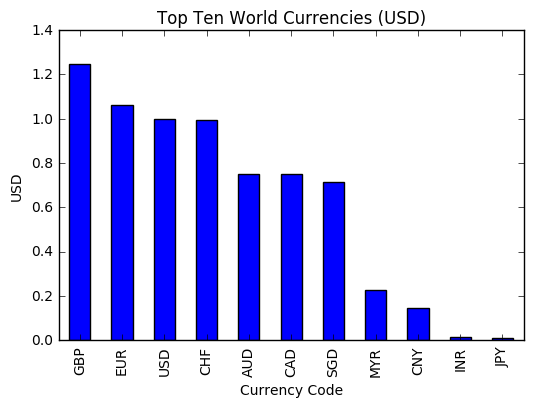

In [780]:
charts=currency_output_plot_data.sort(columns='USD_AMOUNT',ascending=False).plot(kind='bar',legend=None,title="Top Ten World Currencies (USD)")
charts.set_xlabel("Currency Code")
charts.set_ylabel("USD")